# Stepik ML contest
# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import math


In [2]:
# для того, чтобы график красиво выглядел:)

sns.set(rc={'figure.figsize': (9, 6)})

In [3]:
events_data = pd.read_csv('C:\\Users\\Pav\\Desktop\\Py\\event_data_train.csv')

In [4]:
submissions_data = pd.read_csv('C:\\Users\\Pav\\Desktop\\Py\\submissions_data_train.csv')

In [5]:
# На первом этапе важно просто посмотреть на данные: что в них хранится, какие
# поля, какие колонки, какие типы; убедиться в том, что данные, которые к нам 
# пришли, правильные и содержат те наблюдения, которые они должны содержать

events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [6]:
# Элементы таблицы (действия по каждому из стэпов):
# viewed - ПРОСМОТРЕНО, passed - ПРОЙТИ, discovered - УВИДЕТЬ В ПЕРВЙ РАЗ, 
# started_attempt - НАЧАТЬ РЕШАТЬ

events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
# Представляем в формате даты, показываем, что наблюдления
# представлены в секундах.

events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [8]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [9]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [10]:
# добавляем колонку "день"

events_data['day'] = events_data.date.dt.date

In [11]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


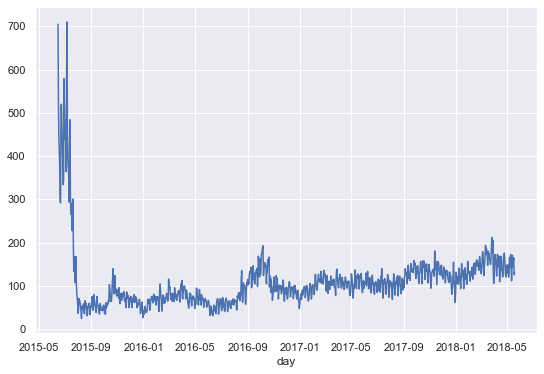

In [19]:
# Cколько для каждого дня уникальных пользователей, которые делали 
# какие-либо действия в этот день:

events_data.groupby('day')\
    .user_id.nunique().plot()

In [20]:
events_data.head() 

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [21]:
# с помощью следующего кода посчитаем число по каждому из действию для каждого 
# пользователя

events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [22]:
# убрали user_id

events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [23]:
# сделали сортировку по убыванию

events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).sort_values('viewed', ascending=False)

action,discovered,passed,started_attempt,viewed
user_id,,,,
20907,163,102,0,32778
10794,198,122,27,16089
25279,198,122,166,9693
1046,128,124,721,8122
3572,194,193,550,6968
...,...,...,...,...
18842,0,1,1,0
8773,0,0,1,0
13181,0,0,7,0


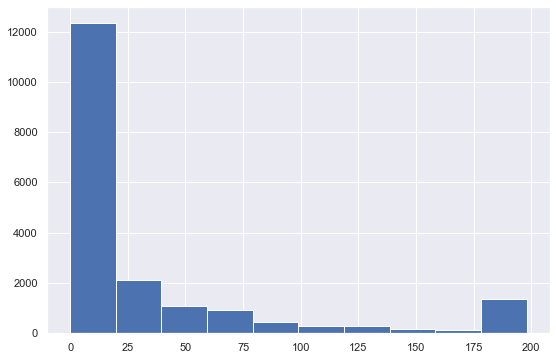

In [24]:
# Для каждого юзера посчитано число стэпов, 
# которые они прошли.
# Гистограмма убывающая, т.к. со временем число юзеров 
# становится все меньше и меньше - они постепенно отпадают.

events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).reset_index().passed.hist()

In [25]:
# Далее работаем с данными о том, правильно ли или нет пользователь выполнил
# задание стэпа

submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [26]:
# Вернули timestamp к дню и дате

submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [27]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [28]:
# Теперь считаем для каждого пользователя число его 
# правильных/неправильных ответов

users_scores = submissions_data.pivot_table(index='user_id',
                                         columns='submission_status',
                                         values='step_id',
                                         aggfunc='count',
                                         fill_value=0).reset_index()

In [29]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [30]:
# Здесь мы для каждого пользователя оставили только по одной строчке 
# на каждый день, который он был онлайн.
# np.diff - разница между двумя ближайшими значениями.

gaps_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values
gaps_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [31]:
# Берем array array-ев и объединяем их в один array c помощью np.concatenate

gaps_data = pd.Series(np.concatenate(gaps_data, axis = 0))

In [32]:
# Значение разницы между двумя заходами на курс

gaps_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [33]:
# Значение разницы между двумя заходами на курс в днях

gaps_data = gaps_data / (24 * 60 * 60)
gaps_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

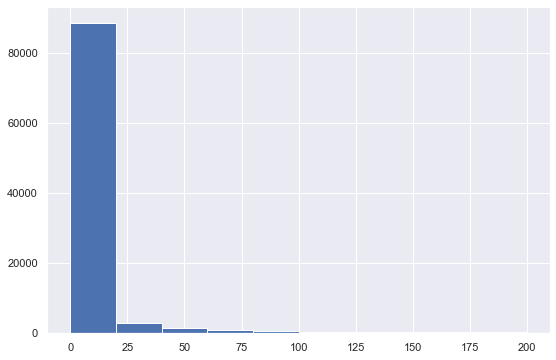

In [35]:
# БОльшая часть гэпов между двумя заходами укладывается в диапазоне 
# от 0 до 25 дней

gaps_data[gaps_data < 200].hist()

In [36]:
gaps_data.quantile(0.90)

18.325995370370403

In [37]:
gaps_data.quantile(0.95)

59.760440972222156

In [ ]:
# Возьмем среднее между двумя этими процентилями - 30 дней.
# Данное значение мы будем использовать для отсечения пользователей, 
# которые ушли с курса.

In [38]:
# Расчитываем максимальный таймстемп 
# (число дней между двумя заходами на курс пользователя).
# Нам нужно выяснить, действительно ли максимальный таймстемп больше заведенного 
# нами значения (30 дней).

events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'})
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [39]:
# Вычислим пороговое значение по отнесению пользователей к "отвалившимся" 
# - те, кто не был активен в течение месяца.

30 * 24 * 60 * 60

2592000

In [40]:
# Переименовали колонку timestamp

users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'}) 

In [41]:
# Cколько времени прошло с последнего посещения пользователя по сравнению 
# с нашим текущим таймстэмпом (текущий таймстемп - 2018.05.19, 
# последняя доступная дата датасета)

now = 1526772811 # последняя дата нашего датасета
drop_out_threshold = 2592000 # порог отсечения

In [42]:
# Выставили порог отсечения, отфильтровали тех пользователей, которые 
# предположительно выбыли

users_data['is_gone_user'] = (now - users_data.last_timestamp) \
> drop_out_threshold

In [43]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [44]:
# Параметр inner работает в методе merge так, что программа смотрит пересечение
# users_data, users_scores, остальное - выкидывает.

# При параметре outer будут отображаться в том числе и те элементы, которые 
# не вошли в пересечение двух множеств (users_data, users_scores),  при этом 
# у них будет пометка NaN.

# Параметр 'on' показывает, по какой колонке нужно мёржиться. По умолчанию merge 
# идет по колонке, которая совпадает в обоих множествах 

users_data = users_data.merge(users_scores, on='user_id', how='outer').head()

In [45]:
# заполняем пропущенные значения

users_data = users_data.fillna(0)
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [48]:
# Сделали таблицу с подсчётом для каждого юзера его событий

users_events_data = events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).reset_index()
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [51]:
# объединили таблицы users_data и users_events_data

users_data = users_data.merge(users_events_data, how='outer')

users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1


In [50]:
# сколько уникальных дней пользователь провел на курсе

users_days = events_data.groupby('user_id').day.nunique() \
.to_frame().reset_index()

users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [329]:
# присоединили таблицу уник. дней к нашей общей

users_data = users_data.merge(users_days, how='outer')

In [330]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1.472827e+09,True,0.0,0.0,1,0,0,1,1
1,2,1.519227e+09,True,2.0,0.0,9,9,2,10,2
2,3,1.444582e+09,True,29.0,23.0,91,87,30,192,7
3,5,1.499860e+09,True,2.0,2.0,11,11,4,12,2
4,7,1.521635e+09,True,0.0,0.0,1,1,0,1,1


In [ ]:
# Проверка на правильность выполнения - не потеряли ли мы ничего. 
# Смотрим число юзеров в финальной таблице и в сырых данных

In [332]:
users_data.user_id.nunique()

19234

In [333]:
events_data.user_id.nunique()

19234

In [336]:
# проверка на то, правда ли пользователь прошел курс
# ставим порог по пройденным стэпам

users_data['passed_course'] = users_data.passed > 170

In [337]:
# Группируем пользователей по числу прошедших/не прошедших курс

users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,5,5,5,5,17809,17809,17809,17809,17809
True,1425,0,0,0,0,1425,1425,1425,1425,1425


In [338]:
# Получаем долю прошедших курс. Обычно в онлайн-курсах такой порог и имеет место.
# Этот этап очень важен для проверки непротиворечивости данных

100 * 1425 / 17809

8.001572238755685